# Business Data EDA

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from glob import glob

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("poster")

In [2]:
def time_marker(text=''):
    print('[{}] {}'.format(datetime.datetime.now().time(), text))

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import matplotlib
font = {'size' : 50}
matplotlib.rc('font', **font)

TITLE_FONT_SIZE = 25
LABEL_FONT_SIZE = 15
TICK_FONT_SIZE  = 15

day_labels = ['MON','TUE','WED','THU','FRI','SAT','SUN']
day_labels_full = ['MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY']
month_labels = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
month_labels_full = ['JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']

FIG_SIZE = (15,6)
FIG_SIZE_SHORT = (15,3)
GRID_DIMS = 15

DO_WRITE_CHARTS = False

# Load Review Data

In [4]:
time_marker(text='Loading Review Data...')

business = pd.DataFrame()
file_path_slug = '../clean_data/business/*.csv'
file_list = glob(file_path_slug)


# Chunk Settings
chunks = list()
chunksize = 10000
newest_review_date = pd.Timestamp('2017-07-26')

for ii, file in enumerate(file_list):
    time_marker('Reading {} of {} {}...'.format(ii+1, len(file_list), file))
    num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/chunksize)
    format_width = len(str(num_chunks))

    # import file in chunks
    for jj, chunk in enumerate(pd.read_csv(file, chunksize=chunksize, iterator=True, index_col=0)):

#         # drop reviews with missing review text
#         chunk = chunk[~chunk.text.isnull()].copy()
        
        # lowercase text
#         chunk.text = chunk.text.str.lower()
#         chunk['review_length'] = chunk.text.str.len()
        
#         # append review age in days, previously found the 'newest review' to be 2017-07-26
#         chunk['review_age'] = chunk.apply(lambda row: (newest_review_date - row.date).days, axis=1)
        
        
        # append chunk to chunks list
        chunks.append(chunk)        
        
        if jj % 10 == 0 or jj == num_chunks:
            time_marker(text='\tfinished chunk {} of {}'.format(str(jj+1).rjust(format_width), str(num_chunks).rjust(format_width)))

time_marker(text='merging to dataframe...')
business = pd.concat(chunks)

time_marker('reseting index...')
business.reset_index(inplace=True, drop=True)
time_marker(text='Complete!')


[10:01:47.250668] Loading Review Data...
[10:01:47.256047] Reading 1 of 64 ../clean_data/business/07_6_business_clean.csv...


/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[10:01:48.099936] 	finished chunk 1 of 1
[10:01:48.100211] Reading 2 of 64 ../clean_data/business/26_P_business_clean.csv...


/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28,60,61,62,63,64,65,66,77,78,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[10:01:48.861015] 	finished chunk 1 of 1
[10:01:48.861462] Reading 3 of 64 ../clean_data/business/33_W_business_clean.csv...


/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[10:01:49.684409] 	finished chunk 1 of 1
[10:01:49.684684] Reading 4 of 64 ../clean_data/business/24_N_business_clean.csv...
[10:01:50.444411] 	finished chunk 1 of 1
[10:01:50.445015] Reading 5 of 64 ../clean_data/business/36_Z_business_clean.csv...
[10:01:51.167927] 	finished chunk 1 of 1
[10:01:51.168166] Reading 6 of 64 ../clean_data/business/49_l_business_clean.csv...


/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28,40,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[10:01:51.971269] 	finished chunk 1 of 1
[10:01:51.971517] Reading 7 of 64 ../clean_data/business/13_C_business_clean.csv...
[10:01:52.754361] 	finished chunk 1 of 1
[10:01:52.754607] Reading 8 of 64 ../clean_data/business/57_t_business_clean.csv...
[10:01:53.631600] 	finished chunk 1 of 1
[10:01:53.631884] Reading 9 of 64 ../clean_data/business/29_S_business_clean.csv...
[10:01:54.753213] 	finished chunk 1 of 1
[10:01:54.753479] Reading 10 of 64 ../clean_data/business/18_H_business_clean.csv...
[10:01:55.906380] 	finished chunk 1 of 1
[10:01:55.906627] Reading 11 of 64 ../clean_data/business/22_L_business_clean.csv...
[10:01:56.712683] 	finished chunk 1 of 1
[10:01:56.712943] Reading 12 of 64 ../clean_data/business/14_D_business_clean.csv...
[10:01:57.489882] 	finished chunk 1 of 1
[10:01:57.490467] Reading 13 of 64 ../clean_data/business/47_j_business_clean.csv...
[10:01:58.184349] 	finished chunk 1 of 1
[10:01:58.184663] Reading 14 of 64 ../clean_data/business/40_c_business_clean.cs

/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28,60,61,62,63,64,65,66,77,78,79,80,81,82,83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[10:02:03.960066] 	finished chunk 1 of 1
[10:02:03.960427] Reading 21 of 64 ../clean_data/business/11_A_business_clean.csv...
[10:02:04.763257] 	finished chunk 1 of 1
[10:02:04.763561] Reading 22 of 64 ../clean_data/business/06_5_business_clean.csv...
[10:02:05.572966] 	finished chunk 1 of 1
[10:02:05.573273] Reading 23 of 64 ../clean_data/business/09_8_business_clean.csv...
[10:02:06.400113] 	finished chunk 1 of 1
[10:02:06.400442] Reading 24 of 64 ../clean_data/business/34_X_business_clean.csv...
[10:02:07.364890] 	finished chunk 1 of 1
[10:02:07.365235] Reading 25 of 64 ../clean_data/business/31_U_business_clean.csv...
[10:02:08.228174] 	finished chunk 1 of 1
[10:02:08.228546] Reading 26 of 64 ../clean_data/business/05_4_business_clean.csv...
[10:02:08.993347] 	finished chunk 1 of 1
[10:02:08.993585] Reading 27 of 64 ../clean_data/business/50_m_business_clean.csv...
[10:02:09.812117] 	finished chunk 1 of 1
[10:02:09.812427] Reading 28 of 64 ../clean_data/business/59_v_business_clean

/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[10:02:14.995448] 	finished chunk 1 of 1
[10:02:14.995702] Reading 34 of 64 ../clean_data/business/19_I_business_clean.csv...
[10:02:15.756186] 	finished chunk 1 of 1
[10:02:15.756452] Reading 35 of 64 ../clean_data/business/43_f_business_clean.csv...
[10:02:16.445875] 	finished chunk 1 of 1
[10:02:16.446126] Reading 36 of 64 ../clean_data/business/28_R_business_clean.csv...
[10:02:17.118451] 	finished chunk 1 of 1
[10:02:17.118714] Reading 37 of 64 ../clean_data/business/38_a_business_clean.csv...
[10:02:17.861130] 	finished chunk 1 of 1
[10:02:17.861412] Reading 38 of 64 ../clean_data/business/54_q_business_clean.csv...
[10:02:18.555849] 	finished chunk 1 of 1
[10:02:18.556099] Reading 39 of 64 ../clean_data/business/12_B_business_clean.csv...
[10:02:19.292823] 	finished chunk 1 of 1
[10:02:19.293073] Reading 40 of 64 ../clean_data/business/62_y_business_clean.csv...
[10:02:20.026782] 	finished chunk 1 of 1
[10:02:20.027018] Reading 41 of 64 ../clean_data/business/04_3_business_clean

/Users/samgutentag/anaconda/envs/spring/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (60,61,62,63,64,65,66,77,78,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[10:02:32.941359] 	finished chunk 1 of 1
[10:02:32.941636] Reading 59 of 64 ../clean_data/business/58_u_business_clean.csv...
[10:02:33.625476] 	finished chunk 1 of 1
[10:02:33.625726] Reading 60 of 64 ../clean_data/business/20_J_business_clean.csv...
[10:02:34.334853] 	finished chunk 1 of 1
[10:02:34.335105] Reading 61 of 64 ../clean_data/business/42_e_business_clean.csv...
[10:02:35.016935] 	finished chunk 1 of 1
[10:02:35.017185] Reading 62 of 64 ../clean_data/business/08_7_business_clean.csv...
[10:02:35.711625] 	finished chunk 1 of 1
[10:02:35.711874] Reading 63 of 64 ../clean_data/business/03_2_business_clean.csv...
[10:02:36.418421] 	finished chunk 1 of 1
[10:02:36.418674] Reading 64 of 64 ../clean_data/business/52_o_business_clean.csv...
[10:02:37.128803] 	finished chunk 1 of 1
[10:02:37.129143] merging to dataframe...
[10:02:47.489661] reseting index...
[10:02:47.495036] Complete!


In [5]:
reviews.info()

NameError: name 'reviews' is not defined

In [5]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,review_length,review_age
0,uYHaNptLzDLoV_JZ_MuzUA,0,2014-05-07,0.0,fbVYETRuWDw8QnpimpGMpg,4.0,well i like the idea of motel one. always in ...,1.0,Cx4UCow0zQgFQOp47RRRaA,314,1176
1,jQsNFOzDpxPmOurSWCg1vQ,0,2014-04-22,0.0,fk8OI26dAhQfot46T_SXWg,1.0,if i could give no stars i would. my family pl...,0.0,KrQ_dWOBn2voaQLNv7hj8A,683,1191
2,jQsNFOzDpxPmOurSWCg1vQ,1,2014-05-03,0.0,CxVx2FD73kw--RuzXL_RVA,4.0,i like pei wei overall and enjoy their varied ...,1.0,xlkjaJUu2fVojeaaVgQPOw,143,1180
3,jQsNFOzDpxPmOurSWCg1vQ,1,2014-05-29,1.0,jJaU6pbKkYgl15P-5zfg3A,3.0,everything was good except thai chicken wraps....,0.0,alTlRb9qMBX11pARX05Big,232,1154
4,jQsNFOzDpxPmOurSWCg1vQ,0,2014-10-01,0.0,pxs5biP-IzmjXZpoh-iVHg,2.0,went in for lunch with a coworker today. the s...,0.0,Ns0hZ0xDOuVRMpHk0Q-5Yw,551,1029


# Write to File

In [ ]:
for year in reviews.date.dt.year.unique():
    reviews[reviews.date.dt.year == year].to_csv('../clean_data/reviews/{:d}_reviews_with_age_clean.csv'.format(year), encoding='utf-8')
    time_marker('wrote {:d} reviews to file'.format(year))

In [ ]:
reviews.head(3)

# Investigation

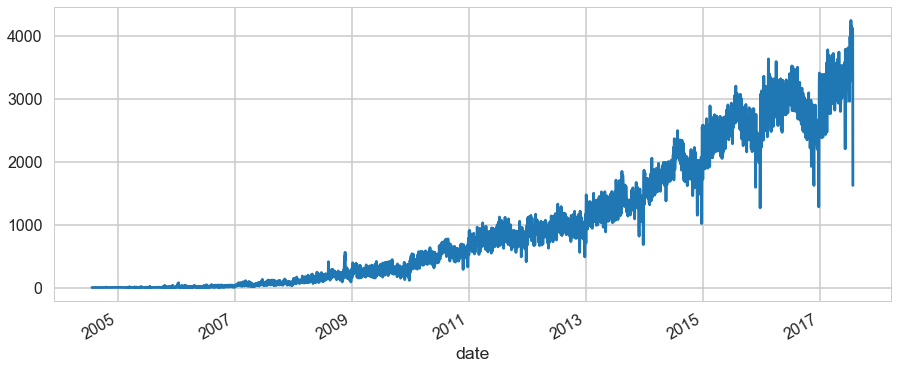

In [7]:
plt.subplots(figsize=FIG_SIZE)
reviews.groupby('date').count()['review_id'].plot()
plt.show()
plt.close()

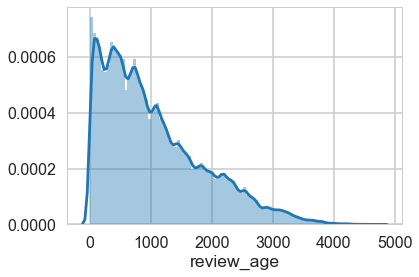

In [8]:
ax = sns.distplot(reviews.review_age, bins=100)
plt.show()
plt.close()

In [9]:
for col in reviews.columns:
    print('{} unique {} values'.format(str(len(reviews[col].unique())).rjust(10), col.ljust(12)))

    156638 unique business_id  values
       160 unique cool         values
      4409 unique date         values
       152 unique funny        values
   4736897 unique review_id    values
         5 unique stars        values
   4734001 unique text         values
       206 unique useful       values
   1183363 unique user_id      values
      5001 unique review_length values
      4409 unique review_age   values


# Annual Growth

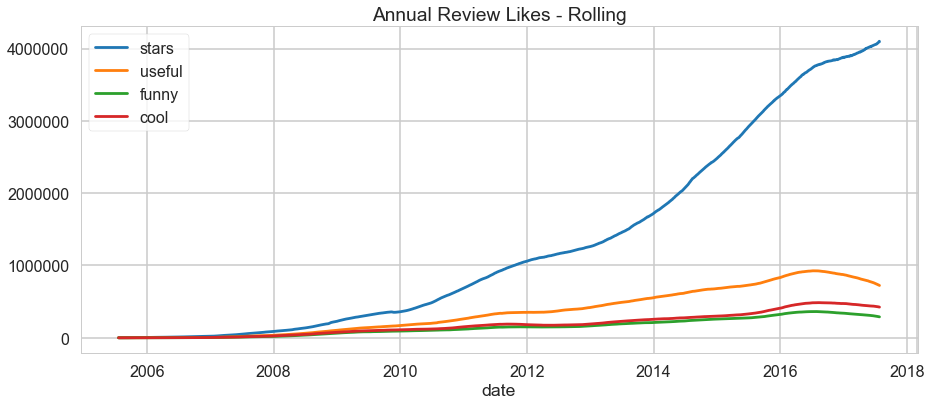

In [10]:
reviews_df = reviews[['date', 'stars', 'useful' , 'funny', 'cool']].copy()
reviews_by_date = reviews_df.groupby('date').sum()
reviews_by_date.head(3)

ax = reviews_by_date.resample('D').sum().rolling(365).sum().plot(figsize=FIG_SIZE)
ax.legend(loc=2, frameon=True)
ax.set_title('Annual Review Likes - Rolling')
plt.show()
plt.close()

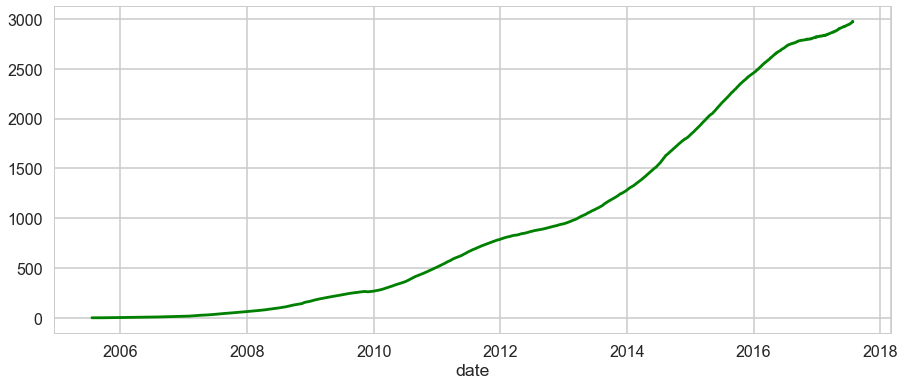

In [11]:
plt.subplots(figsize=FIG_SIZE)
ax = reviews.groupby(reviews.date).count()['user_id'].resample('D').sum().rolling(365).mean().plot(color='g')
plt.show()
plt.close()

# Clustering

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
time_marker('collecting review text...')
text = [x for x in reviews.text]

[23:54:55.816035] collecting review text...


In [14]:
time_marker('initializing vectorizer...')
vectorizer = CountVectorizer()

[23:54:56.981792] initializing vectorizer...


In [15]:
time_marker('fitting vectorizer...')
vectorizer.fit(text)

[23:54:56.991396] fitting vectorizer...


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [16]:
time_marker('transforming vectorizer...')
x = vectorizer.transform(text)
time_marker('done')

[00:10:20.651583] transforming vectorizer...
[00:24:09.621215] done


In [ ]:
time_marker('convert to array...')
x = x.toarray()

[00:25:16.763860] convert to array...


In [17]:
print("")
print("Words for each feature:")
print(vectorizer.get_feature_names())


Words for each feature:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
reviews.head(3)

In [ ]:
def make_xy(df, label, vectorizer=None):
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X =  vectorizer.for_transform(df[label])
    X = X.tocsc()
    y = (df[label] == target).values.astype(np.int)
    return X, y

In [ ]:
X, y = make_xy(reviews, text, stars)
